# Supplementary Materials Part 5.5: Tree-based methods.

The models here are not covered in IT1244 AT ALL - so everything that is covered here is additional material that I have decided to write myself. In this lesson, we'll be covering decision trees and random forests (and maybe gradient boosting) here. 

Like all supplementary lessons, these lessons are NOT compulsory. They're merely here to give you a few more ideas to use in your project.

With that being said, let's start!

In [1]:
import numpy as np
import pandas as pd 

water = pd.read_csv("data/water_cleaned.csv", index_col ="Unnamed: 0")

# Let's split the data into X and y 
X = water.drop("Potability", axis = 1)
y = water["Potability"]


### Part 1: Not... initialisation of models?
Wow! You mean we're not starting with initialisation? 

On a serious note though, let's talk about what decision trees are. Decision trees are... essentially glorified if-else statements made by the AI. But these glorified if-else statements are able to give very good predictions (depending on the dataset) by continuously splitting. 

Now, let's talk about proper details:
1. A decision tree recursively partitions the features in the dataset based on the feature values. 
2. The decision tree partitions the features based on the highest impurity reduction, calculated with some metrics like Gini impurity or entropy.
3. The decision tree essentially continues making its decision until the maximum depth or having too few samples in a node.

You can take a look at a decision tree diagram right [here](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)!

### Part 2: Initialisation of a decision tree
Here we go. 

By this part, you should have learnt how to manipulate data in Pandas (with the other supplementary materials) or with NumPy. 

As a recap, the workflow of models usually goes like this:
1. Find the model from sklearn - it's usually in a separate library
2. do a train test split on the data (80/20? 70/30? up to you)
3. fit the data onto the training data
4. predict the results using the test data 
5. compare the predictions against the y values of test data

How do we apply this for Decision Trees?

In [2]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# We will then split the data into different datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Save the model into a variable 
dtc = DecisionTreeClassifier()

# Fit the data onto training data
dtc.fit(X_train, y_train)

# Predict results using test data
predictions = dtc.predict(X_test)

# Let's get the accuracy score to see how it does! 
accuracy = accuracy_score(y_test, predictions)
accuracy

0.5493387589013224

We are just using accuracy as a metric even though it's not the best. As you can tell, this is doing a lot worse than a logistic regression... that's not good. As always, can we do better?

### Part 3: Random Forests
Ok, since we have learned about decision trees, let's take it a step up. Can we train a whole ton of decision trees to create a model? 

We can! This is where we introduce the concept of an ensemble.

An ensemble is a collection of models meant to improve the overall performance and reliability of predictions. They combine the predictions of multiple individual models to make more accurate and robust decisions, therefore having better results compared to a single model. 

There are two ways of creating an ensemble, mainly:
1. Bagging - multiple of the same model trained on different subsets of the training data, chosen randomly with replacement. The final prediction is either by averaging for regression tasks, or taking a majority vote for the predictions in the ensemble. 
2. Boosting - a series of models are trained sequentially, each model focusing on correcting the mistakes made by the previous models. The model after will pay more attention to instances misclassified by earlier models. The final prediction is a weighted combination of the predictions from the previous models. 

A random forest is an ensemble of decision trees and they are created using bagging (instead of boosting). We will go into boosting later! 

In [4]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# We will then split the data into different datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Save the model into a variable 
rfc = RandomForestClassifier()

# Fit the data onto training data
rfc.fit(X_train, y_train)

# Predict results using test data
predictions = rfc.predict(X_test)

# Let's get the accuracy score to see how it does! 
accuracy = accuracy_score(y_test, predictions)
accuracy

0.6795523906408952

That's waaaaaaaaaaaay better score than just 1 decision tree! The random forests model really helps with the increase in accuracy. As mentioned, we are just using accuracy as a metric for now even though it's not the best. 

### Part 4: Gradient Boosting
As mentioned above, there is another kind of ensemble model called boosting! I've already given the explanation, so let's just see the implementation. For the most part, everything's the same, but you have your choice of downloading different gradient boosting libraries to do gradient boosting!

For me personally, I love using XGBoost - but for this lesson we'll use sklearn's GradientBoostingClassifier as a start. 

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# We will then split the data into different datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Save the model into a variable 
gboost = GradientBoostingClassifier()

# Fit the data onto training data
gboost.fit(X_train, y_train)

# Predict results using test data
predictions = gboost.predict(X_test)

# Let's get the accuracy score to see how it does! 
accuracy = accuracy_score(y_test, predictions)
accuracy

0.6602238046795524

Still better than a basic decision tree, but we realise that the gradient boosting classifier is doing slightly worse than the random forest classifier. If you change this with another gradient boosting method, however, you might be able to get much better results (accuracy-wise).

### Part 5: A new metric
We've covered the classification report last lesson. However, there is another metric that we can use for classification called the ROCAUC (Receiver Operating Characteristic Area Under the Curve).

What is ROCAUC? Essentially, we are just plotting the false positive rate of our predictions on the x-axis and the true positive rate on the y-axis.

ROCAUC should be used when:
1. You care equally about positive and negative classes.
2. Your data is relatively balanced. 

There is more to ROCAUC, but you can also add this as a metric. You probably should think really hard in terms of which metric you'd like to use. 

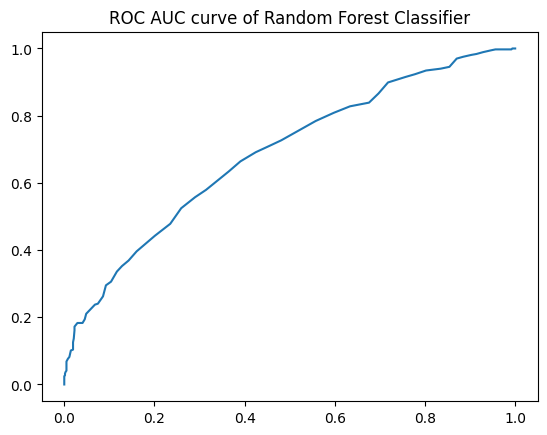

In [8]:
import matplotlib.pyplot as plt

# Credits: My own IT1244 project... search my github for more LOL 
# If you'd like to use this on your project, I think you might have to credit my code so please do!
def graphing(X_test, model, name = 'model'):

    y_pred = model.predict_proba(X_test)[:, 1]
    thresholds = np.linspace(0,1,101)

    scores = []

    for t in thresholds:
        actual_positive = (y_test == 1)
        actual_negative = (y_test == 0)

        pred_positive = (y_pred >= t)
        pred_negative = (y_pred < t)

        tp = (actual_positive & pred_positive).sum()
        tn = (actual_negative & pred_negative).sum()
        fp = (pred_positive & actual_negative).sum()
        fn = (pred_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
    
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    scores_data = pd.DataFrame(scores, columns = columns)
    scores_data['tpr'] = scores_data.tp / (scores_data.tp + scores_data.fn)
    scores_data['fpr'] = scores_data.fp / (scores_data.fp + scores_data.tn)
    
    plt.plot(scores_data.fpr, scores_data.tpr, label='Model')
    plt.title("ROC AUC curve of " + name)

# Let's try this with random forests!
graphing(X_test, rfc, name = 'Random Forest Classifier')

### Part 6: Hyperparameter Tuning
Hyperparameter Tuning matters for tree-based models a LOT more than some of the other models that we have covered in our previous lesson. I'd not like to repeat myself, but do take a look at some of the documentation for the hyperparameters that you can tune for the different models, like the [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

### Part 7: Further reading

Here's some additional reading material for you:
1. [Using some of these metrics](https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc) - I think neptune.ai does this really well. 
2. [Finding another way to tune your hyperparameters? Try Optuna!](https://www.kaggle.com/code/corochann/optuna-tutorial-for-hyperparameter-optimization)

We're almost at the end! Just one more thing to go :) 